# Metrics

In [13]:
import torch
import matplotlib.pyplot as plt

In [3]:
# Load in saved metrics from previous runs
m_2 = torch.load('metrics/resnet18_128_5_2.pt')
m_3 = torch.load('metrics/resnet18_128_5_3.pt')
m_4 = torch.load('metrics/resnet18_128_5_4.pt')

In [23]:
# Adjust time data
t_2 = [(t - m_2['trace']['t'][0]) / 60 for t in m_2['trace']['t']]
t_3 = [(t - m_3['trace']['t'][0]) / 60 for t in m_3['trace']['t']]
t_4 = [(t - m_4['trace']['t'][0]) / 60 for t in m_4['trace']['t']]

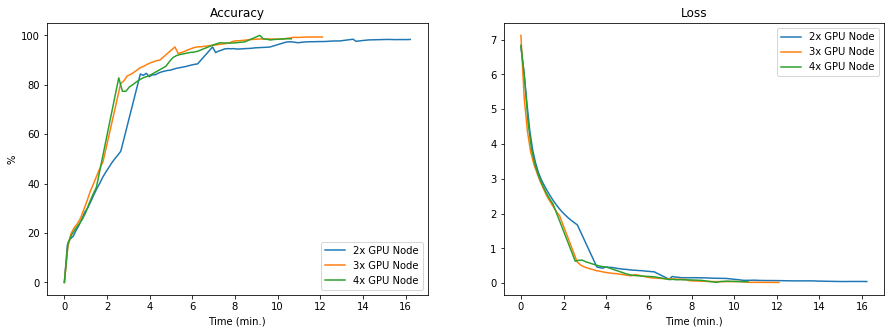

In [41]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(t_2, m_2['trace']['top1'], label = '2x GPU Node')
plt.plot(t_3, m_3['trace']['top1'], label = '3x GPU Node' )
plt.plot(t_4, m_4['trace']['top1'], label = '4x GPU Node')
plt.title('Accuracy')
plt.xlabel('Time (min.)')
plt.ylabel('%')
plt.legend()
plt.subplot(1,2,2)
plt.plot(t_2, m_2['trace']['losses'], label = '2x GPU Node')
plt.plot(t_3, m_3['trace']['losses'], label = '3x GPU Node' )
plt.plot(t_4, m_4['trace']['losses'], label = '4x GPU Node')
plt.title('Loss')
plt.xlabel('Time (min.)')
plt.legend()

Text(0, 0.5, 'Time (s)')

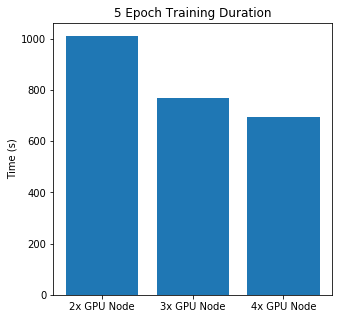

In [48]:
plt.figure(figsize=(5,5))
x = ['2x GPU Node', '3x GPU Node', '4x GPU Node']
y = [m_2['train_time'], m_3['train_time'], m_4['train_time']]
plt.bar(x,y)
plt.title('5 Epoch Training Duration')
plt.ylabel('Time (s)')